# Walmart - Machine	Learning Project

## Business	Problem 1
Walmart Technology has been tasked with identifying two groups of people for marketing purposes: People who earn an income of less than 50,000 and those who earn more than 50,000. To assist in this pursuit, Walmart has developed a means of accessing 40 different demographic and employment related variables for any person they are interested in marketing to. Additionally, Walmart has been able to compile a dataset that provides gold labels for a variety of observations of these 40 variables within the population. Using the dataset given, train and validate a classifier that predicts this outcome.

## Business	Problem 2
Walmart is also interested in developing a rudimentary segmentation model of the people represented in this dataset in the context of marketing. Using one or more of your favorite machine learning or data science techniques, create such a segmentation model and demonstrate how the resulting groups differ from one another.

## answer 1
I tried two classification models: random forest and logistic regression with 3 datasets (original, undersample of major classs, oversample of minor class). <br>

For random forest <br>
auc:0.851
AccuracyScore:0.833
Precision:0.944
False Alarm Rate:0.128

For logistic regression <br>
auc:0.861
AccuracyScore:0.840
Precision:0.945
False Alarm Rate:0.115

## answer 2
Group 0: young, income less than 50k, no wage, lower education level <br>
Group 1: middle-aged, income more than 50k, has a wage, higher education level <br>
Group 2: old, income less than 50k, no wage, lower education level

### **Metadata** 
**age**: numerical <br />
**class of worker**: nominal <br />
**detailed industry recode**: nominal <br />
**detailed occupation recode**: nominal <br />
**education**: nominal>>ordinal <br />
**wage per hour**: numerical <br />
**enroll in edu inst last wk**: nominal <br />
**marital stat**: nominal <br />
**major industry code**: nominal <br />
**major occupation code**: nominal <br />
**race**: nominal <br />
**hispanic origin**: nominal <br />
**sex**: nominal <br />
**member of a labor union**: nominal <br />
**reason for unemployment**: nominal  <br />
**full or part time employment stat**: nominal <br />
**capital gains**: numerical <br />
**capital losses**: numerical <br />
**dividends from stocks**: numerical <br />
**tax filer stat**: nominal <br />
**region of previous residence**: nominal <br />
**state of previous residence**: nominal (too many) <br />
**detailed household and family stat**: nominal (too many) <br />
**detailed household summary in household**: nominal <br />
**instance weight**: don't use <br />
**migration code-change in msa**: nominal <br />
**migration code-change in reg**: nominal <br />
**migration code-move within reg**: nominal <br />
**live in this house 1 year ago**: nominal <br />
**migration prev res in sunbelt**: nominal <br />
**num persons worked for employer**: numerical <br />
**family members under 18**: nominal <br />
**country of birth father**: nominal (too many) <br />
**country of birth mother**: nominal (too many) <br />
**country of birth self**: nominal (too many) <br />
**citizenship**: nominal <br />
**own business or self employed**: nominal <br />
**fill inc questionnaire for veteran's admin**: nominal <br />
**veterans benefits**: nominal <br />
**weeks worked in year**: numerical <br />
**year**: nominal <br />
**label**: nominal <br />

## 1.Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"data\raw\census-income.data", header=None)
with open(r"data\raw\census-income.columns", 'r+', encoding='utf-8') as file_obj:
    r = file_obj.readlines()
header=[]
for i in range(len(r)):
    header.append(r[i].strip('\n'))
print(header)

['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', "fill inc questionnaire for veteran's admin", 'veterans benefits', 'week

In [3]:
df.columns=header
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [5]:
for count, col in enumerate(df.columns):
        print(df.loc[:,col].value_counts())

34    3489
35    3450
36    3353
31    3351
33    3340
      ... 
85     423
86     348
87     301
88     241
89     195
Name: age, Length: 91, dtype: int64
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: class of worker, dtype: int64
0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       

1601.40    32
753.23     32
1191.21    32
1787.34    32
1317.51    31
           ..
2975.58     1
2302.06     1
1460.52     1
297.57      1
4664.87     1
Name: instance weight, Length: 99800, dtype: int64
?                   99696
Nonmover            82538
MSA to MSA          10601
NonMSA to nonMSA     2811
Not in universe      1516
MSA to nonMSA         790
NonMSA to MSA         615
Abroad to MSA         453
Not identifiable      430
Abroad to nonMSA       73
Name: migration code-change in msa, dtype: int64
?                                 99696
Nonmover                          82538
Same county                        9812
Different county same state        2797
Not in universe                    1516
Different region                   1178
Different state same division       991
Abroad                              530
Different division same region      465
Name: migration code-change in reg, dtype: int64
?                               99696
Nonmover                        82538
S

In [6]:
#check the col with any ? or 'Not in universe' value
dict_na={}
for count, col in enumerate(df.columns):
    if '?' in df.loc[:,col].value_counts().index or 'Not in universe' in df.loc[:,col].value_counts().index:
        pre=len(np.where((df[col]=='Not in universe') | (df[col]=='?'))[0])/len(df)
        dict_na[col]=pre
dict_na=dict(sorted(dict_na.items(), key=lambda item: item[1], reverse=True))
print(dict_na)

{"fill inc questionnaire for veteran's admin": 0.9900562842379074, 'reason for unemployment': 0.9695774421996461, 'enroll in edu inst last wk': 0.9369496248552799, 'state of previous residence': 0.9244949203851185, 'region of previous residence': 0.920946457300662, 'migration prev res in sunbelt': 0.920946457300662, 'member of a labor union': 0.9044521183021507, 'family members under 18': 0.7228840785272875, 'migration code-change in msa': 0.5072698385649774, 'migration code-change in reg': 0.5072698385649774, 'migration code-move within reg': 0.5072698385649774, 'major occupation code': 0.5046235271121625, 'class of worker': 0.5024232795216591, 'country of birth father': 0.03364524390671752, 'country of birth mother': 0.030668143522300687, 'country of birth self': 0.017005558256441615}


In [7]:
#check the col with a major class
print('no capital: ', len(df.loc[df['capital gains']==0,:])/len(df))
print('no wage: ', len(df.loc[df['wage per hour']==0,:])/len(df))
print('citizenship: ',len(np.where((df['citizenship']=='Native- Born in the United States'))[0])/len(df))
print('hispanic origin: ',len(np.where((df['hispanic origin']=='All other'))[0])/len(df))
print('race: ',len(np.where((df['race']=='White'))[0])/len(df))
print('full or part time employment stat: ',len(np.where((df['full or part time employment stat']=='Children or Armed Forces'))[0])/len(df))
print('live in this house 1 year ago: ',len(np.where((df['live in this house 1 year ago']=='Not in universe under 1 year old'))[0])/len(df))
print('major industry code: ',len(np.where((df['major industry code']=='Not in universe or children'))[0])/len(df))

no capital:  0.9630167950562091
no wage:  0.943344877532916
citizenship:  0.8870756754860342
hispanic origin:  0.8615898918921628
race:  0.8388255990537432
full or part time employment stat:  0.6203244738701804
live in this house 1 year ago:  0.5072698385649774
major industry code:  0.5046235271121625


In [8]:
#check the data is imbalanced
df['label'].value_counts(normalize=True)

- 50000.    0.937942
50000+.     0.062058
Name: label, dtype: float64

In [9]:
#check the difference between 1994 and 1995
df['year'].value_counts(normalize=True)

94    0.500328
95    0.499672
Name: year, dtype: float64

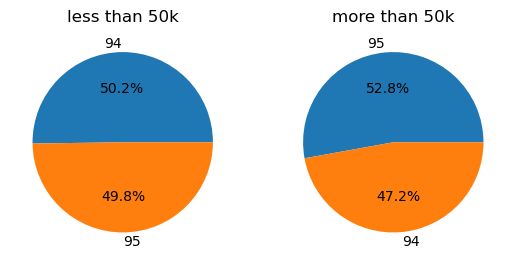

In [10]:
#check the difference of label between 1994 and 1995

def pie(data,name):
    l5=data.loc[data['label']=='- 50000.',:]
    g5=data.loc[data['label']!='- 50000.',:]
    fig, axs = plt.subplots(1,2)
    axs[0].pie(l5.loc[:,name].value_counts(),labels=l5.loc[:,name].value_counts().index.tolist(), autopct='%1.1f%%')
    axs[0].set_title('less than 50k')
    axs[1].pie(g5.loc[:,name].value_counts(),labels=g5.loc[:,name].value_counts().index.tolist(), autopct='%1.1f%%')
    axs[1].set_title('more than 50k')
pie(df,'year')

## 2. Data cleaning and feature engineering

In [11]:
df_new=df.copy()
df_new.drop('instance weight',axis=1,inplace=True)
df_new.drop('year',axis=1,inplace=True)
df_new.drop(["fill inc questionnaire for veteran's admin",'reason for unemployment',
             'enroll in edu inst last wk','state of previous residence','region of previous residence',
            'migration prev res in sunbelt','member of a labor union'],axis=1,inplace=True)
df_new

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,race,...,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,label
0,73,Not in universe,0,0,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,...,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,0,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,52,- 50000.
2,18,Not in universe,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,- 50000.
3,9,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0,- 50000.
4,10,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,0,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,2,0,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,...,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,52,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,6,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,2,52,- 50000.
199521,16,Not in universe,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,White,...,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,2,0,- 50000.


In [12]:
# replace '?'
for col in ['family members under 18', 'migration code-change in msa', 'migration code-change in reg', 
            'migration code-move within reg', 'major occupation code', 'class of worker', 'country of birth father', 
            'country of birth mother', 'country of birth self']:
    df_new[col] = df_new[col].replace('?','Not in universe')

In [13]:
# extract one major class and the rest is other
df_new['citizenship_cov']=np.where(df['citizenship']=='Native- Born in the United States',1,0)
df_new['hispanic_cov']=np.where(df['hispanic origin']=='All other',0,1)
df_new['race_cov']=np.where(df['race']=='White',1,0)
df_new.drop(['citizenship','hispanic origin','race'],axis=1,inplace=True)

In [14]:
# convert education to have less classes
df_new.loc[:,'education'].value_counts()

High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

In [15]:
remap_cat_dict = {
    'Children':0,
    'Less than 1st grade': 0,   
    '1st 2nd 3rd or 4th grade': 1,
    '5th or 6th grade': 1,
    '7th and 8th grade': 1,
    '9th grade': 1,
    '10th grade': 1,
    '11th grade': 1,
    'High school graduate': 2,
    '12th grade no diploma': 2,
    'Some college but no degree': 3,
    'Bachelors degree(BA AB BS)':3,
    'Masters degree(MA MS MEng MEd MSW MBA)':4,
    'Associates degree-occup /vocational':4,
    'Associates degree-academic program':4,
    'Doctorate degree(PhD EdD)':5,
    'Prof school degree (MD DDS DVM LLB JD)':5
    }
df_new.education = df_new.education.map(remap_cat_dict).astype('category')
df_new.education.astype('int')
df_new.education.value_counts()

2    50533
0    48241
3    47685
1    33746
4    16262
5     3056
Name: education, dtype: int64

In [16]:
# extract one major class and the rest is other
df_new['capital']=df_new['capital gains']-df_new['capital losses']+df_new['dividends from stocks']
df_new['invest']=np.where(df_new['capital']!=0,1,0)
df_new.drop(['capital','capital gains','capital losses','dividends from stocks'],axis=1,inplace=True)
df_new

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,sex,...,country of birth mother,country of birth self,own business or self employed,veterans benefits,weeks worked in year,label,citizenship_cov,hispanic_cov,race_cov,invest
0,73,Not in universe,0,0,2,0,Widowed,Not in universe or children,Not in universe,Female,...,United-States,United-States,0,2,0,- 50000.,1,0,1,0
1,58,Self-employed-not incorporated,4,34,3,0,Divorced,Construction,Precision production craft & repair,Male,...,United-States,United-States,0,2,52,- 50000.,1,0,1,0
2,18,Not in universe,0,0,1,0,Never married,Not in universe or children,Not in universe,Female,...,Vietnam,Vietnam,0,2,0,- 50000.,0,0,0,0
3,9,Not in universe,0,0,0,0,Never married,Not in universe or children,Not in universe,Female,...,United-States,United-States,0,0,0,- 50000.,1,0,1,0
4,10,Not in universe,0,0,0,0,Never married,Not in universe or children,Not in universe,Female,...,United-States,United-States,0,0,0,- 50000.,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,1,0,Married-civilian spouse present,Not in universe or children,Not in universe,Male,...,United-States,United-States,0,2,0,- 50000.,1,0,1,0
199519,65,Self-employed-incorporated,37,2,1,0,Married-civilian spouse present,Business and repair services,Executive admin and managerial,Male,...,United-States,United-States,0,2,52,- 50000.,1,0,1,1
199520,47,Not in universe,0,0,3,0,Married-civilian spouse present,Not in universe or children,Not in universe,Male,...,Poland,Germany,0,2,52,- 50000.,0,0,1,1
199521,16,Not in universe,0,0,1,0,Never married,Not in universe or children,Not in universe,Female,...,United-States,United-States,0,2,0,- 50000.,1,0,1,0


In [17]:
# extract one major class and the rest is other
df_new['wage']=np.where(df_new['wage per hour']!=0,1,0)
df_new.drop('wage per hour',axis=1,inplace=True)
df_new

,age,class of worker,detailed industry recode,detailed occupation recode,education,marital stat,major industry code,major occupation code,sex,full or part time employment stat,...,country of birth self,own business or self employed,veterans benefits,weeks worked in year,label,citizenship_cov,hispanic_cov,race_cov,invest,wage
0,73,Not in universe,0,0,2,Widowed,Not in universe or children,Not in universe,Female,Not in labor force,...,United-States,0,2,0,- 50000.,1,0,1,0,0
1,58,Self-employed-not incorporated,4,34,3,Divorced,Construction,Precision production craft & repair,Male,Children or Armed Forces,...,United-States,0,2,52,- 50000.,1,0,1,0,0
2,18,Not in universe,0,0,1,Never married,Not in universe or children,Not in universe,Female,Not in labor force,...,Vietnam,0,2,0,- 50000.,0,0,0,0,0
3,9,Not in universe,0,0,0,Never married,Not in universe or children,Not in universe,Female,Children or Armed Forces,...,United-States,0,0,0,- 50000.,1,0,1,0,0
4,10,Not in universe,0,0,0,Never married,Not in universe or children,Not in universe,Female,Children or Armed Forces,...,United-States,0,0,0,- 50000.,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,1,Married-civilian spouse present,Not in universe or children,Not in universe,Male,Not in labor force,...,United-States,0,2,0,- 50000.,1,0,1,0,0
199519,65,Self-employed-incorporated,37,2,1,Married-civilian spouse present,Business and repair services,Executive admin and managerial,Male,Children or Armed Forces,...,United-States,0,2,52,- 50000.,1,0,1,1,0
199520,47,Not in universe,0,0,3,Married-civilian spouse present,Not in universe or children,Not in universe,Male,Children or Armed Forces,...,Germany,0,2,52,- 50000.,0,0,1,1,0
199521,16,Not in universe,0,0,1,Never married,Not in universe or children,Not in universe,Female,Not in labor force,...,United-States,0,2,0,- 50000.,1,0,1,0,0


In [18]:
df_new.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'marital stat',
       'major industry code', 'major occupation code', 'sex',
       'full or part time employment stat', 'tax filer stat',
       'detailed household and family stat',
       'detailed household summary in household',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'num persons worked for employer', 'family members under 18',
       'country of birth father', 'country of birth mother',
       'country of birth self', 'own business or self employed',
       'veterans benefits', 'weeks worked in year', 'label', 'citizenship_cov',
       'hispanic_cov', 'race_cov', 'invest', 'wage'],
      dtype='object')

In [19]:
df_new.drop('detailed household and family stat',axis=1,inplace=True)
df_new.drop('migration code-move within reg',axis=1,inplace=True)
df_new.drop(['detailed industry recode','detailed occupation recode'],axis=1,inplace=True)

In [20]:
df_new['country of birth']=''
for i in range(len(df_new)):
    if df_new['country of birth father'].iloc[i]==df_new['country of birth mother'].iloc[i]:
        if df_new['country of birth father'].iloc[i]==df_new['country of birth self'].iloc[i]:
            df_new['country of birth'].iloc[i]='all same'
        else:
            df_new['country of birth'].iloc[i]='parent same but self diff'
    if df_new['country of birth father'].iloc[i]!=df_new['country of birth mother'].iloc[i]:
        if df_new['country of birth father'].iloc[i]==df_new['country of birth self'].iloc[i] or df_new['country of birth mother'].iloc[i]==df_new['country of birth self'].iloc[i]:
            df_new['country of birth'].iloc[i]='parent diff but self same'
        else:
            df_new['country of birth'].iloc[i]='all diff'

In [21]:
df_new['country of birth'].value_counts()

all same                     172493
parent same but self diff     12994
parent diff but self same     12069
all diff                       1967
Name: country of birth, dtype: int64

In [22]:
df_new.drop(['country of birth father', 'country of birth mother', 'country of birth self'],axis=1,inplace=True)

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   age                                      199523 non-null  int64   
 1   class of worker                          199523 non-null  object  
 2   education                                199523 non-null  category
 3   marital stat                             199523 non-null  object  
 4   major industry code                      199523 non-null  object  
 5   major occupation code                    199523 non-null  object  
 6   sex                                      199523 non-null  object  
 7   full or part time employment stat        199523 non-null  object  
 8   tax filer stat                           199523 non-null  object  
 9   detailed household summary in household  199523 non-null  object  
 10  migration code-chang

In [24]:
cat=['class of worker', 'marital stat', 'major industry code',
       'major occupation code', 'sex', 'full or part time employment stat', 'tax filer stat', 
       'detailed household summary in household',
       'migration code-change in msa', 'migration code-change in reg', 'live in this house 1 year ago',
       'own business or self employed', 'family members under 18', 'veterans benefits', 'label', 'citizenship_cov',
       'hispanic_cov', 'race_cov', 'invest', 'wage','country of birth']
con=['age','education','num persons worked for employer','weeks worked in year']

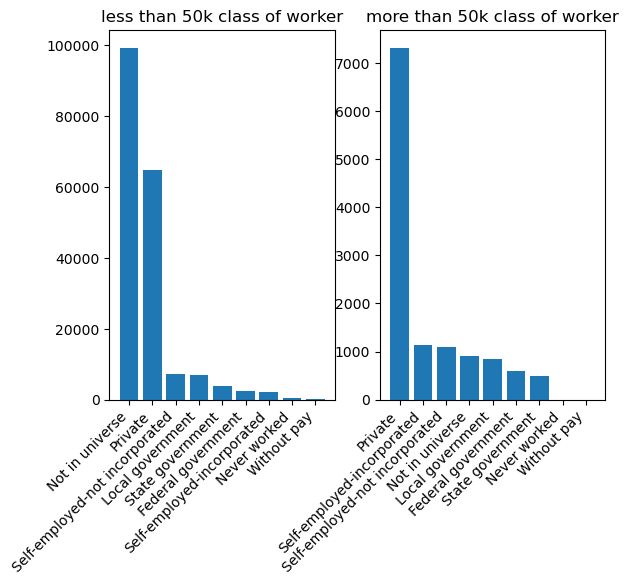

In [25]:
#bar plot to present the feature pattern of non-default and default
def bar(data,name):
    l5=data.loc[data['label']=='- 50000.',:]
    g5=data.loc[data['label']!='- 50000.',:]
    fig, axs = plt.subplots(1,2)
    axs[0].bar(l5.loc[:,name].value_counts().index, l5.loc[:,name].value_counts().values)
    axs[0].set_title('less than 50k '+name)
    axs[0].set_xticklabels(l5.loc[:,name].value_counts().index,rotation = 45,ha='right')
    axs[1].bar(g5.loc[:,name].value_counts().index, g5.loc[:,name].value_counts().values)
    axs[1].set_title('more than 50k '+name)
    axs[1].set_xticklabels(g5.loc[:,name].value_counts().index,rotation = 45,ha='right')
bar(df_new,'class of worker')

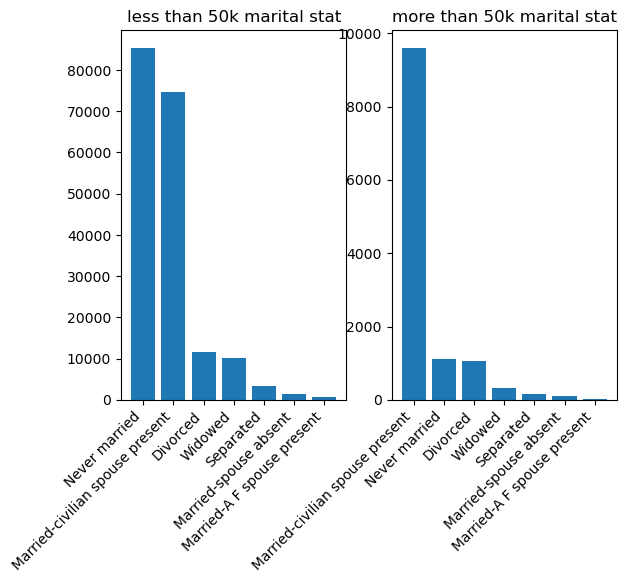

In [26]:
bar(df_new,'marital stat')

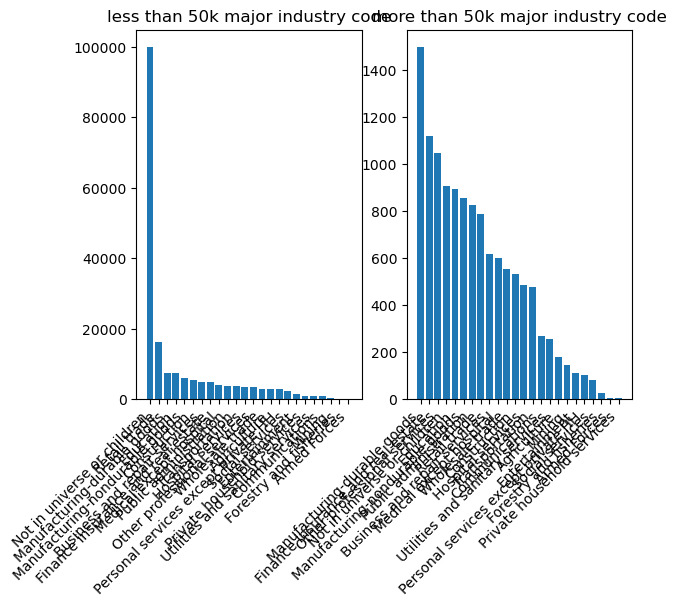

In [27]:
bar(df_new,'major industry code')

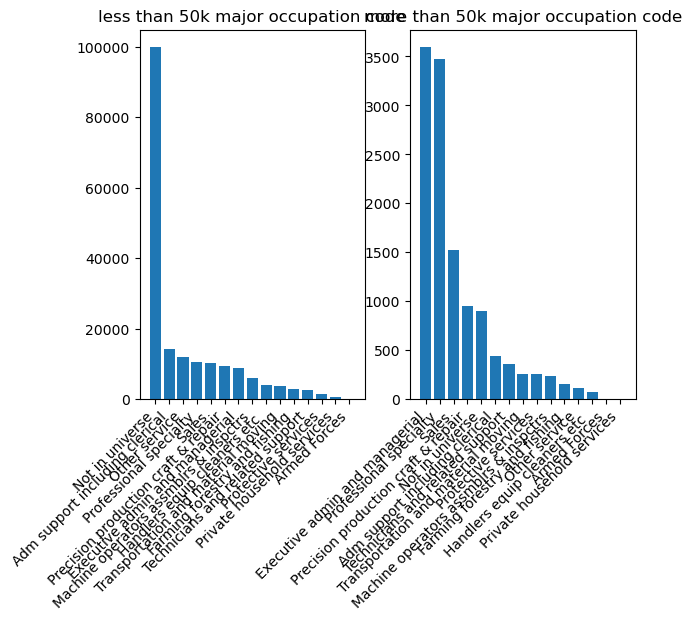

In [28]:
bar(df_new,'major occupation code')

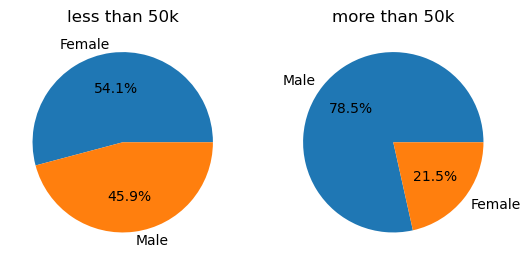

In [29]:
pie(df,'sex')

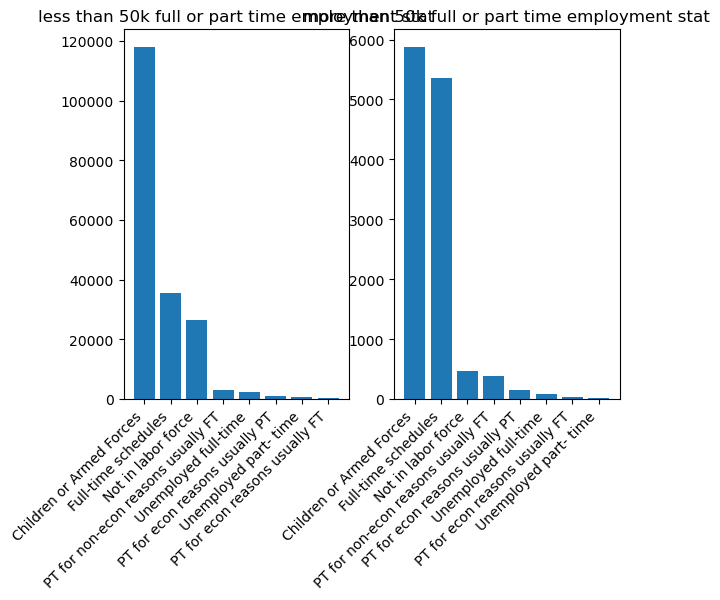

In [30]:
bar(df_new,'full or part time employment stat')

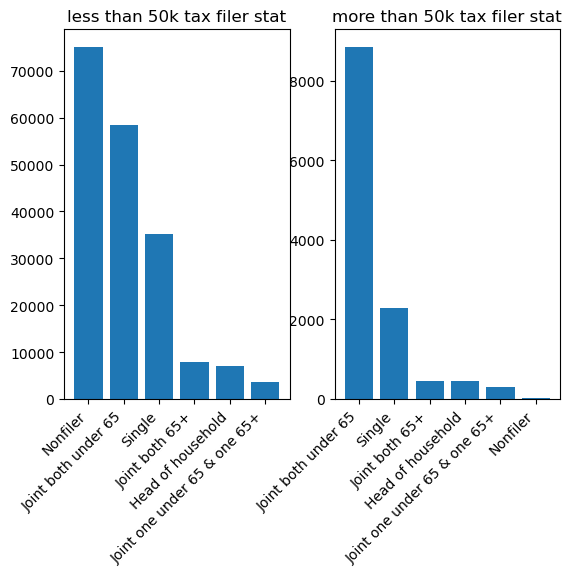

In [31]:
bar(df_new,'tax filer stat')

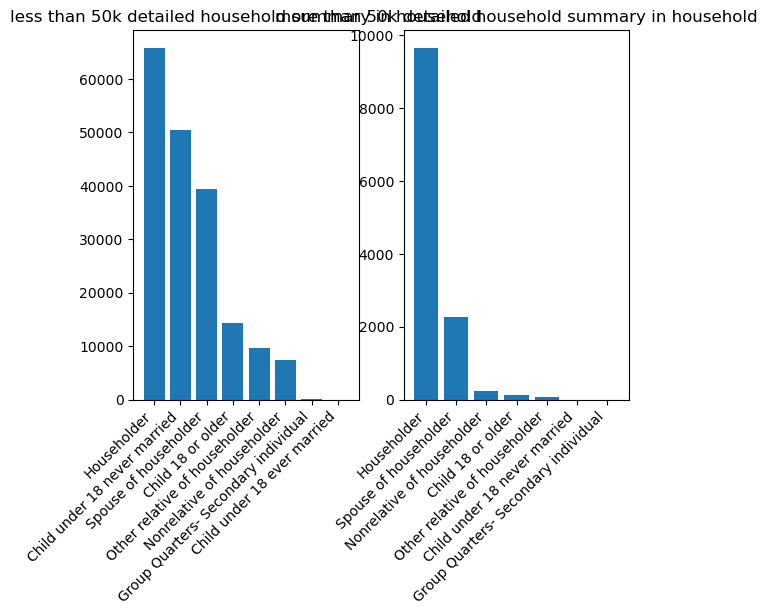

In [32]:
bar(df_new,'detailed household summary in household')

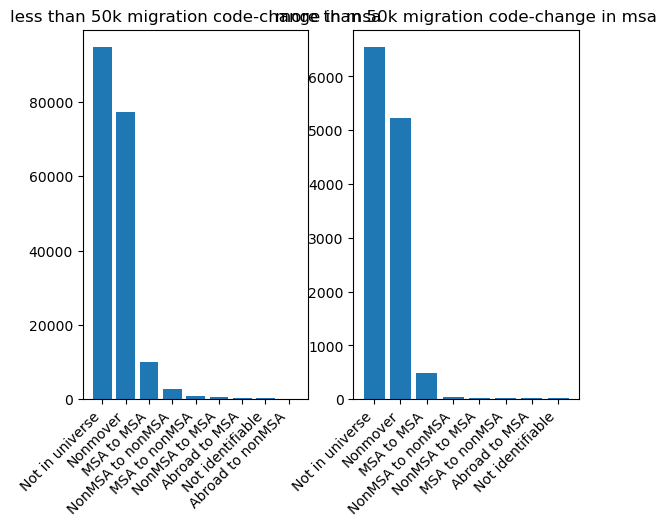

In [33]:
bar(df_new,'migration code-change in msa')

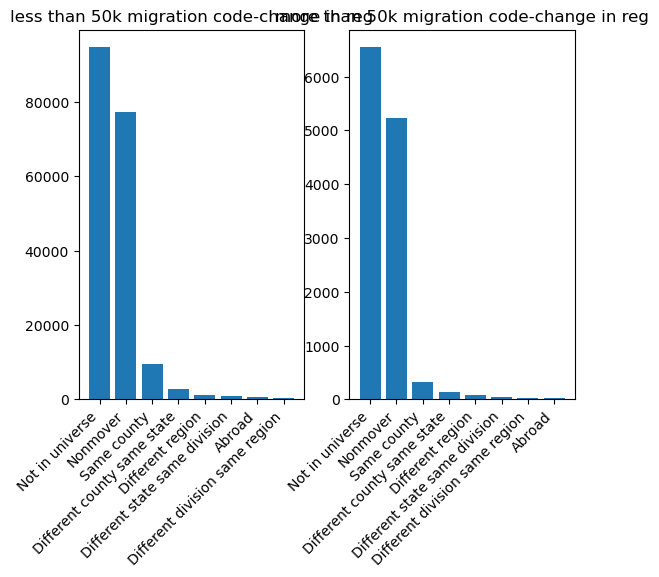

In [34]:
bar(df_new,'migration code-change in reg')

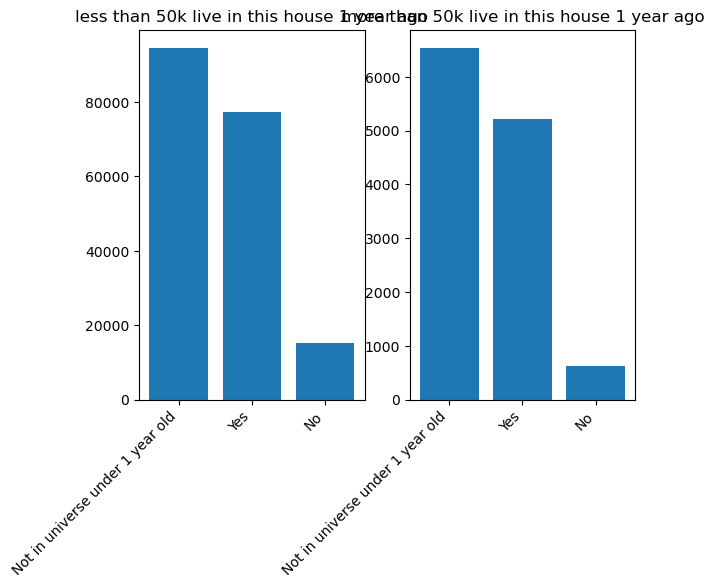

In [35]:
bar(df_new,'live in this house 1 year ago')

In [ ]:
pie(df_new,'family members under 18')

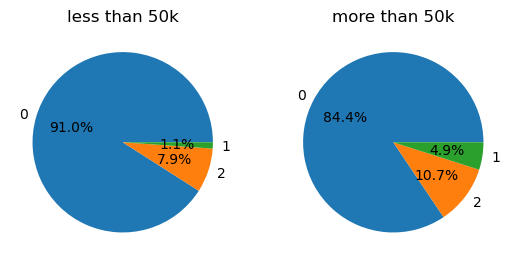

In [36]:
pie(df_new,'own business or self employed')

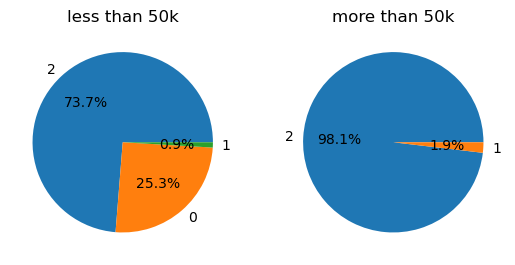

In [37]:
pie(df_new,'veterans benefits')

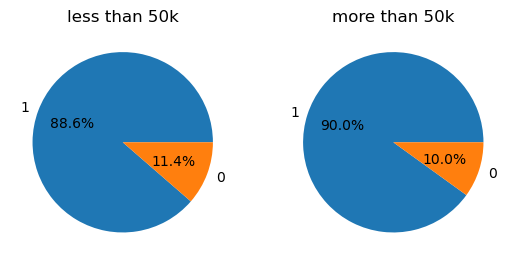

In [38]:
pie(df_new,'citizenship_cov')

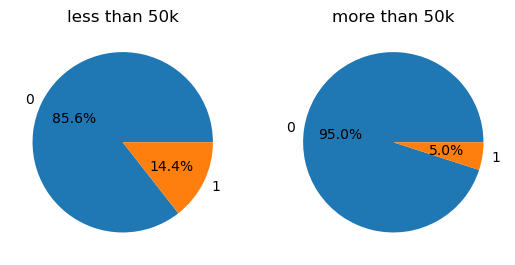

In [39]:
pie(df_new,'hispanic_cov')

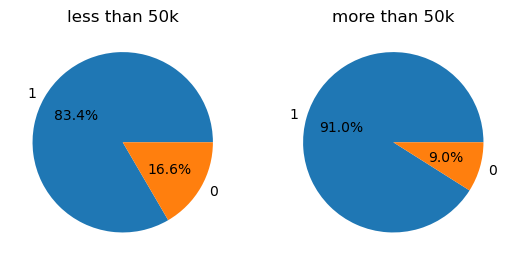

In [40]:
pie(df_new,'race_cov')

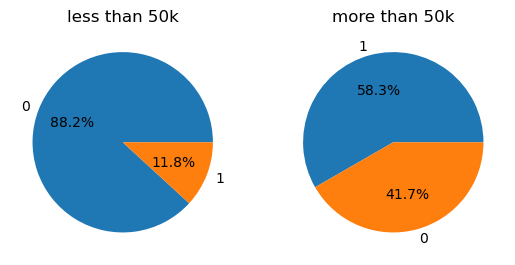

In [41]:
pie(df_new,'invest')

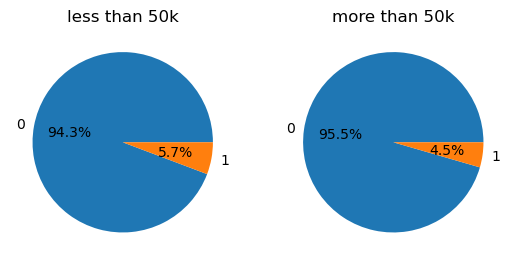

In [42]:
pie(df_new,'wage')

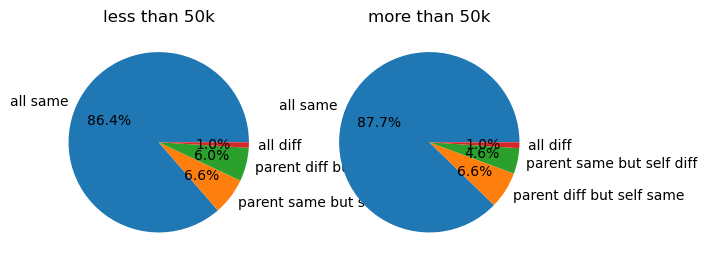

In [43]:
pie(df_new,'country of birth')

In [45]:
df_new.drop(['migration code-change in msa','migration code-change in reg',
             'live in this house 1 year ago',
             'citizenship_cov', 'wage', 'country of birth'],axis=1,inplace=True)

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   age                                      199523 non-null  int64   
 1   class of worker                          199523 non-null  object  
 2   education                                199523 non-null  category
 3   marital stat                             199523 non-null  object  
 4   major industry code                      199523 non-null  object  
 5   major occupation code                    199523 non-null  object  
 6   sex                                      199523 non-null  object  
 7   full or part time employment stat        199523 non-null  object  
 8   tax filer stat                           199523 non-null  object  
 9   detailed household summary in household  199523 non-null  object  
 10  num persons worked f

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [48]:
multi_cols=['class of worker', 'marital stat', 'major industry code',
       'major occupation code', 'full or part time employment stat', 'tax filer stat', 
       'detailed household summary in household',
       'own business or self employed', 'veterans benefits','family members under 18']
bin_cols=['label','hispanic_cov', 'race_cov', 'invest', 'sex']
num_cols=['age','education','num persons worked for employer','weeks worked in year']

In [49]:
df_new = pd.get_dummies(data = df_new,columns = multi_cols )

In [50]:
le = LabelEncoder()
for i in bin_cols:
    df_new[i] = le.fit_transform(df_new[i])

In [51]:
std = StandardScaler()
df_new[num_cols] = std.fit_transform(df_new[num_cols])

In [52]:
df_new

,age,education,sex,num persons worked for employer,weeks worked in year,label,hispanic_cov,race_cov,invest,class of worker_Federal government,...,own business or self employed_1,own business or self employed_2,veterans benefits_0,veterans benefits_1,veterans benefits_2,family members under 18_Both parents present,family members under 18_Father only present,family members under 18_Mother only present,family members under 18_Neither parent present,family members under 18_Not in universe
0,1.725879,0.152725,0,-0.827096,-0.949346,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1.053560,0.898662,1,-0.404284,1.180804,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.739291,-0.593211,0,-0.827096,-0.949346,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,-1.142682,-1.339147,0,-0.827096,-0.949346,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,-1.097861,-1.339147,0,-0.827096,-0.949346,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,2.353376,-0.593211,1,-0.827096,-0.949346,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
199519,1.367309,-0.593211,1,-0.404284,1.180804,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
199520,0.560526,0.898662,1,1.709774,1.180804,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
199521,-0.828933,-0.593211,0,-0.827096,-0.949346,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


<AxesSubplot:>

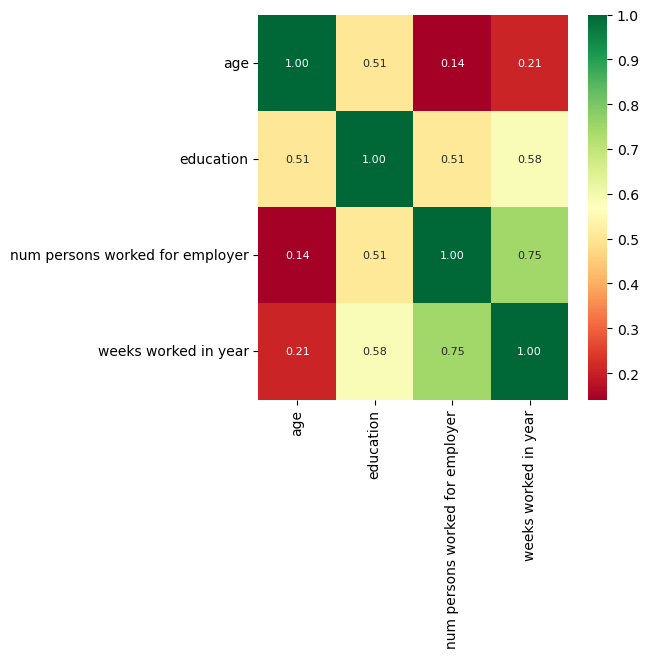

In [53]:
plt.figure(figsize = (5,5))
sns.heatmap(df_new[num_cols].corr(), cmap = "RdYlGn", annot = True, annot_kws={"fontsize":8}, fmt=".2f")

## 3. Baseline classification model building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve,auc
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [55]:
train,test = train_test_split(df_new,test_size = .25 ,random_state = 111)

In [56]:
train_copy=train.copy()
test_copy=test.copy()
train_x=train_copy.drop('label',axis=1,inplace=False)
test_x=test_copy.drop('label',axis=1,inplace=False)
train_y=train['label']
test_y=test['label']

In [57]:
RF=RandomForestClassifier(class_weight = 'balanced_subsample',n_jobs=-1)
RF.fit(train_x,train_y)
predictions_rf   = RF.predict(test_x)
probabilities_rf = RF.predict_proba(test_x)

In [58]:
print ("\n Classification report : \n",classification_report(test_y,predictions_rf))
print ("Accuracy   Score : ",accuracy_score(test_y,predictions_rf))


 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     46748
           1       0.54      0.35      0.42      3133

    accuracy                           0.94     49881
   macro avg       0.75      0.66      0.70     49881
weighted avg       0.93      0.94      0.93     49881

Accuracy   Score :  0.9407590064353161


In [59]:
conf_matrix = confusion_matrix(test_y,predictions_rf, normalize='true')
print(conf_matrix)

model_roc_auc = roc_auc_score(test_y,predictions_rf) 
print ("Area under curve : ",model_roc_auc,"\n")

[[0.98051254 0.01948746]
 [0.65240983 0.34759017]]
Area under curve :  0.6640513522312802 



## 4. Hyparameter tuning and model evaluation for classification

In [1]:
inlist=['age', 'education', 'sex', 'num persons worked for employer',
       'weeks worked in year', 'hispanic_cov', 'race_cov', 'invest',
       'class of worker_Federal government',
       'class of worker_Local government', 'class of worker_Never worked',
       'class of worker_Not in universe', 'class of worker_Private',
       'class of worker_Self-employed-incorporated',
       'class of worker_Self-employed-not incorporated',
       'class of worker_State government', 'class of worker_Without pay',
       'marital stat_Divorced', 'marital stat_Married-A F spouse present',
       'marital stat_Married-civilian spouse present',
       'marital stat_Married-spouse absent', 'marital stat_Never married',
       'marital stat_Separated', 'marital stat_Widowed',
       'major industry code_Agriculture', 'major industry code_Armed Forces',
       'major industry code_Business and repair services',
       'major industry code_Communications',
       'major industry code_Construction', 'major industry code_Education',
       'major industry code_Entertainment',
       'major industry code_Finance insurance and real estate',
       'major industry code_Forestry and fisheries',
       'major industry code_Hospital services',
       'major industry code_Manufacturing-durable goods',
       'major industry code_Manufacturing-nondurable goods',
       'major industry code_Medical except hospital',
       'major industry code_Mining',
       'major industry code_Not in universe or children',
       'major industry code_Other professional services',
       'major industry code_Personal services except private HH',
       'major industry code_Private household services',
       'major industry code_Public administration',
       'major industry code_Retail trade',
       'major industry code_Social services',
       'major industry code_Transportation',
       'major industry code_Utilities and sanitary services',
       'major industry code_Wholesale trade',
       'major occupation code_Adm support including clerical',
       'major occupation code_Armed Forces',
       'major occupation code_Executive admin and managerial',
       'major occupation code_Farming forestry and fishing',
       'major occupation code_Handlers equip cleaners etc ',
       'major occupation code_Machine operators assmblrs & inspctrs',
       'major occupation code_Not in universe',
       'major occupation code_Other service',
       'major occupation code_Precision production craft & repair',
       'major occupation code_Private household services',
       'major occupation code_Professional specialty',
       'major occupation code_Protective services',
       'major occupation code_Sales',
       'major occupation code_Technicians and related support',
       'major occupation code_Transportation and material moving',
       'full or part time employment stat_Children or Armed Forces',
       'full or part time employment stat_Full-time schedules',
       'full or part time employment stat_Not in labor force',
       'full or part time employment stat_PT for econ reasons usually FT',
       'full or part time employment stat_PT for econ reasons usually PT',
       'full or part time employment stat_PT for non-econ reasons usually FT',
       'full or part time employment stat_Unemployed full-time',
       'full or part time employment stat_Unemployed part- time',
       'tax filer stat_Head of household', 'tax filer stat_Joint both 65+',
       'tax filer stat_Joint both under 65',
       'tax filer stat_Joint one under 65 & one 65+',
       'tax filer stat_Nonfiler', 'tax filer stat_Single',
       'detailed household summary in household_Child 18 or older',
       'detailed household summary in household_Child under 18 ever married',
       'detailed household summary in household_Child under 18 never married',
       'detailed household summary in household_Group Quarters- Secondary individual',
       'detailed household summary in household_Householder',
       'detailed household summary in household_Nonrelative of householder',
       'detailed household summary in household_Other relative of householder',
       'detailed household summary in household_Spouse of householder',
       'own business or self employed_0', 'own business or self employed_1',
       'own business or self employed_2', 'veterans benefits_0',
       'veterans benefits_1', 'veterans benefits_2',
       'family members under 18_Both parents present',
       'family members under 18_Father only present',
       'family members under 18_Mother only present',
       'family members under 18_Neither parent present',
       'family members under 18_Not in universe']

In [61]:
from imblearn.over_sampling import RandomOverSampler

#oversampling minority class using random sampling
ROS = RandomOverSampler(random_state = 11) 
os_rs_X, os_rs_Y = ROS.fit_resample(train_x,train_y)
os_rs_X = pd.DataFrame(data = os_rs_X,columns=inlist)
os_rs_Y = pd.DataFrame(data = os_rs_Y,columns=['label'])

In [62]:
from imblearn.under_sampling import RandomUnderSampler

#undersampling majority class using random sampling
RUS = RandomUnderSampler(random_state = 11)
us_rs_X,us_rs_Y = RUS.fit_resample(train_x,train_y)
us_rs_X = pd.DataFrame(data = us_rs_X,columns=inlist)
us_rs_Y = pd.DataFrame(data = us_rs_Y,columns=['label'])

In [63]:
data_in = [[train_x,train_y],
           [os_rs_X, os_rs_Y],
           [us_rs_X, us_rs_Y]]

In [64]:
#evaluation mertics
def evl(model,data):
    for features, labels in data:
        model.fit(features, labels)
        predict_test = model.predict(test_x) 
        cm=confusion_matrix(test_y,predict_test)
        print('auc:%.3f' %roc_auc_score(test_y, predict_test))
        print("AccuracyScore:%.3f" %accuracy_score(test_y,predict_test))
        print("Precision:%.3f" %precision_score(test_y,predict_test,average='weighted'))
        print("False Alarm Rate:%.3f" %(cm[1][0]/(cm[1][0]+cm[1][1])))

In [65]:
#tuning random forest
def search_model(x_train, y_train, est, param_grid, cv):
    model = GridSearchCV(estimator = est, # the estimator/machine learning model
                                     param_grid = param_grid, # parameter grid
                                     scoring = 'f1_weighted', # assign a scoring method 
                                     verbose = 10, # how much text output do we want during the searching process
                                     n_jobs = -1, # the number of process we want to use for the searching job
                                     cv = cv) # number of folds of cross validation
    
    # Fit Grid Search Model
    model.fit(x_train, y_train)   # refit the model to the data
    return model

In [66]:
# this is the parameter choices we would like to try
param_grid = {'n_estimators':[50,100,300]}
RF = search_model(train_x,train_y,RandomForestClassifier(),param_grid,3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [67]:
# check out the searching results
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.cv_results_) 

Best score: 0.938
Best parameters set: {'n_estimators': 300}
Scores: {'mean_fit_time': array([12.12233973, 21.96499737, 46.44116028]), 'std_fit_time': array([0.16398774, 0.09271172, 2.8095335 ]), 'mean_score_time': array([0.93766554, 1.54933333, 3.29220939]), 'std_score_time': array([0.01027535, 0.0244191 , 0.17986417]), 'param_n_estimators': masked_array(data=[50, 100, 300],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 300}], 'split0_test_score': array([0.93802807, 0.93782301, 0.9384975 ]), 'split1_test_score': array([0.93588257, 0.93656424, 0.9363652 ]), 'split2_test_score': array([0.93645792, 0.93795874, 0.93778506]), 'mean_test_score': array([0.93678952, 0.93744866, 0.93754925]), 'std_test_score': array([0.00090674, 0.00062783, 0.00088633]), 'rank_test_score': array([3, 2, 1])}


In [68]:
# random forest with three datasets
RFC = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=1234)
evl(RFC,data_in)

auc:0.668
AccuracyScore:0.946
Precision:0.936
False Alarm Rate:0.649
auc:0.710
AccuracyScore:0.935
Precision:0.933
False Alarm Rate:0.547
auc:0.851
AccuracyScore:0.833
Precision:0.944
False Alarm Rate:0.128


In [69]:
#final random forest model
RFC = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=1234)
RFC.fit(us_rs_X, us_rs_Y)
predict_test_RFC = RFC.predict(test_x) 
predict_test_pro_RFC = RFC.predict_proba(test_x)

In [70]:
mydict_rf={}
for i,key in enumerate(df_new.columns[:-1]):
    mydict_rf[key]=mydict_rf.get(key,0)+RFC.feature_importances_[i]
pd_rf=pd.DataFrame.from_dict(mydict_rf, orient='index')
pd_rf.columns=['feature_importance']
pd_rf.nlargest(10,columns='feature_importance')

,feature_importance
age,0.131667
weeks worked in year,0.102217
education,0.087840
race_cov,0.078401
num persons worked for employer,0.066803
sex,0.034846
tax filer stat_Joint one under 65 & one 65+,0.030471
detailed household summary in household_Group Quarters- Secondary individual,0.025227
major industry code_Mining,0.024167
class of worker_Never worked,0.022258


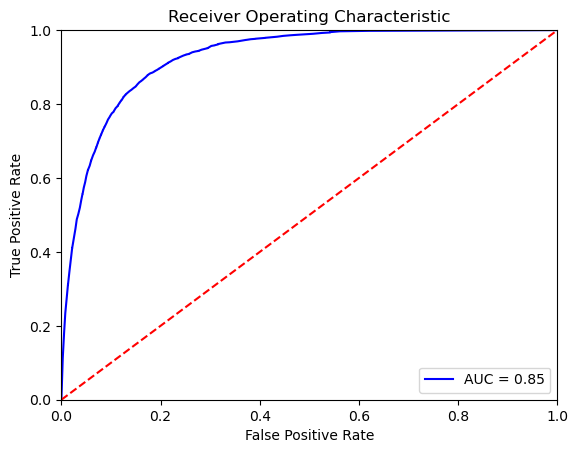

In [71]:
fpr,tpr,thresholds = roc_curve(test_y,predict_test_pro_RFC[:,1])
model_roc_auc = roc_auc_score(test_y,predict_test_RFC) 
plt.title('Receiver Operating Characteristic rf')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
# logistic regression with three datasets
logit  = LogisticRegression(C=1.0, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
evl(logit,data_in)

auc:0.661
AccuracyScore:0.948
Precision:0.938
False Alarm Rate:0.667
auc:0.861
AccuracyScore:0.839
Precision:0.945
False Alarm Rate:0.114
auc:0.861
AccuracyScore:0.840
Precision:0.945
False Alarm Rate:0.115


In [73]:
#final logitic regression model
logit  = LogisticRegression(C=1.0, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logit.fit(us_rs_X, us_rs_Y)
predict_test_log = logit.predict(test_x) 
predict_test_pro_log = logit.predict_proba(test_x)

In [74]:
mydict_lg={}
for i,key in enumerate(df_new.columns[:-1]):
    mydict_lg[key]=mydict_lg.get(key,0)+abs(logit.coef_.ravel()[i])
pd_lg=pd.DataFrame.from_dict(mydict_lg, orient='index')
pd_lg.columns=['feature_importance']
pd_lg.nlargest(10,columns='feature_importance')

,feature_importance
tax filer stat_Joint one under 65 & one 65+,1.494659
race_cov,1.311440
sex,1.127176
major industry code_Personal services except private HH,1.054022
major occupation code_Not in universe,1.018852
major occupation code_Armed Forces,1.015619
major industry code_Retail trade,1.004817
major industry code_Wholesale trade,0.970180
major occupation code_Private household services,0.946184
major industry code_Construction,0.942552


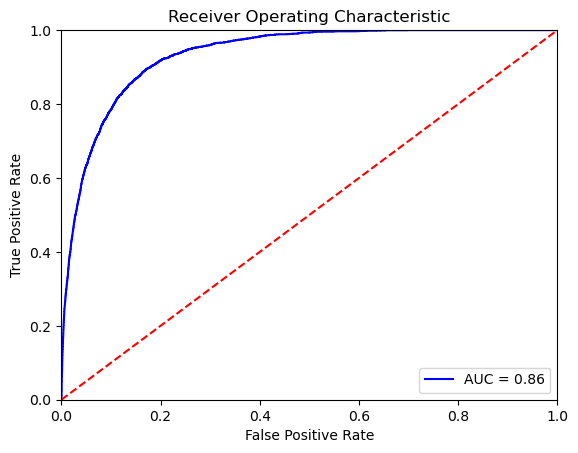

In [75]:
fpr,tpr,thresholds = roc_curve(test_y,predict_test_pro_log[:,1])
model_roc_auc = roc_auc_score(test_y,predict_test_log)
plt.title('Receiver Operating Characteristic lg')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Clustering model and model evaluation

Text(0, 0.5, 'Inertia')

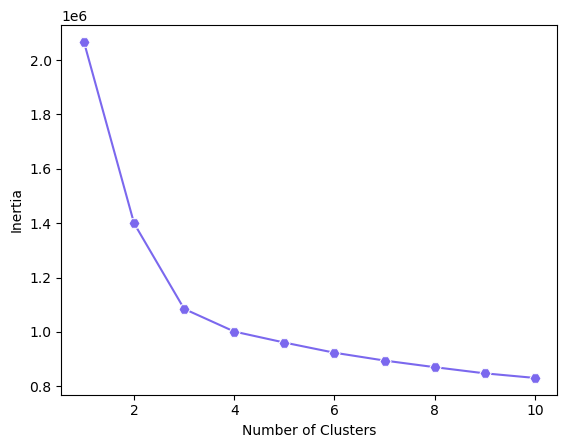

In [76]:
from sklearn.cluster import KMeans
kinertia=[]

for i in range(1,11):
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(df_new)
    kinertia.append(kmodel.inertia_)

inertia_df=pd.DataFrame({"no_k":list(range(1,11)),"inertia":kinertia})

sns.lineplot(x=inertia_df["no_k"],y=inertia_df["inertia"],color="mediumslateblue",
             marker="H",markersize=8,markeredgecolor="w",legend=False)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [77]:
model=KMeans(n_clusters=3)
model.fit(df_new)
labels=model.labels_
labels

array([2, 1, 2, ..., 1, 0, 1])

In [78]:
df_new_cp=df_new.copy()
df_new_cp["CLUSTER"]=labels
df_new_cp

,age,education,sex,num persons worked for employer,weeks worked in year,label,hispanic_cov,race_cov,invest,class of worker_Federal government,...,own business or self employed_2,veterans benefits_0,veterans benefits_1,veterans benefits_2,family members under 18_Both parents present,family members under 18_Father only present,family members under 18_Mother only present,family members under 18_Neither parent present,family members under 18_Not in universe,CLUSTER
0,1.725879,0.152725,0,-0.827096,-0.949346,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,2
1,1.053560,0.898662,1,-0.404284,1.180804,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
2,-0.739291,-0.593211,0,-0.827096,-0.949346,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2
3,-1.142682,-1.339147,0,-0.827096,-0.949346,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,-1.097861,-1.339147,0,-0.827096,-0.949346,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,2.353376,-0.593211,1,-0.827096,-0.949346,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,2
199519,1.367309,-0.593211,1,-0.404284,1.180804,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,1
199520,0.560526,0.898662,1,1.709774,1.180804,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,1
199521,-0.828933,-0.593211,0,-0.827096,-0.949346,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [79]:
cluster_df=df_new_cp.groupby("CLUSTER").mean().T
print(cluster_df.to_markdown())

|                                                                              |            0 |           1 |            2 |
|:-----------------------------------------------------------------------------|-------------:|------------:|-------------:|
| age                                                                          | -1.1745      | 0.186919    |  0.992672    |
| education                                                                    | -1.23238     | 0.605775    |  0.192151    |
| sex                                                                          |  0.509033    | 0.530336    |  0.336563    |
| num persons worked for employer                                              | -0.795883    | 0.800275    | -0.72413     |
| weeks worked in year                                                         | -0.93513     | 0.958439    | -0.888457    |
| label                                                                        |  1.81202e-05 | 0.119824    |  0.0151831   |


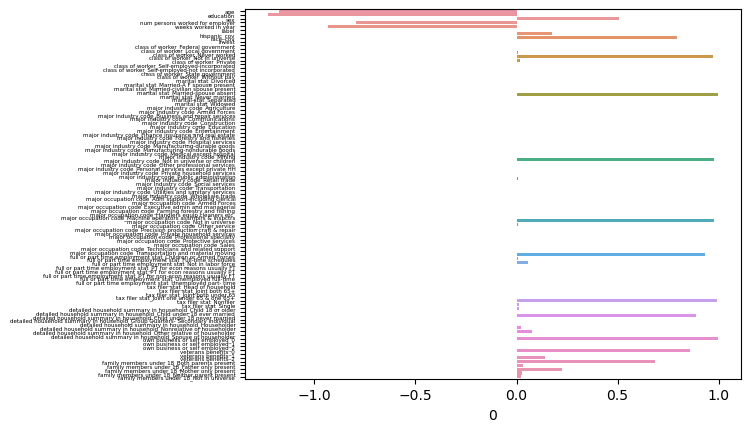

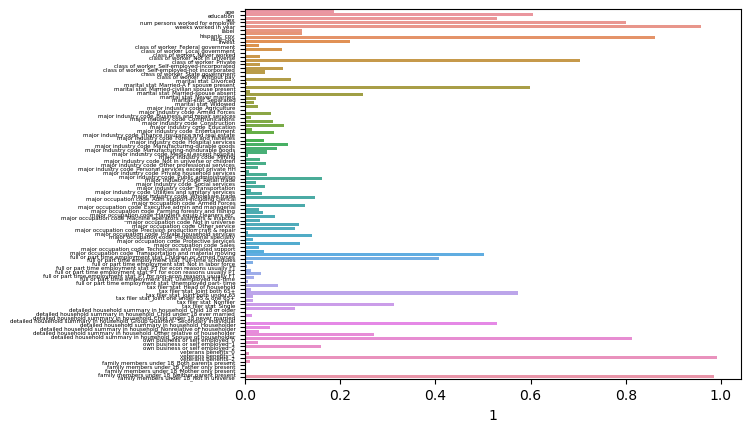

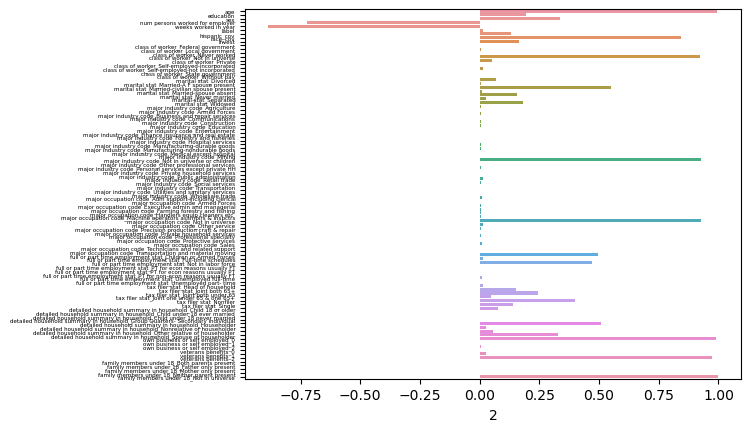

In [80]:
for i in range(0,3):
    sns.barplot(x=cluster_df[i],y=cluster_df.index)
    #plt.xlim(-1.5,1.5)
    plt.yticks(fontsize=4)
    plt.show()

In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pca.fit_transform(df_new_cp)

x=pca_df[:,0]
y=pca_df[:,1]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

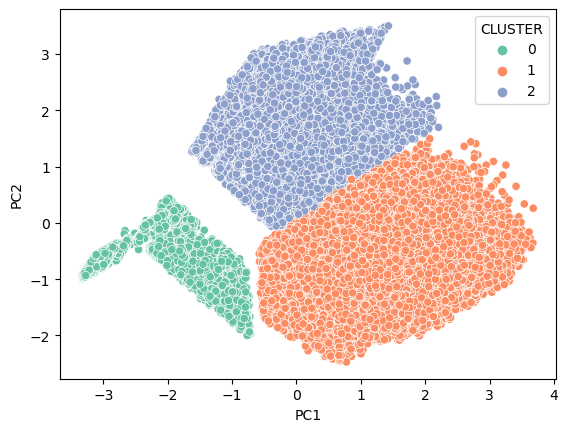

In [82]:
pc=pd.DataFrame({"PC1":x,"PC2":y,"CLUSTER":labels})
sns.scatterplot(x=pc["PC1"],y=pc["PC2"],hue=pc["CLUSTER"],palette="Set2")